<a href="https://colab.research.google.com/github/jcbertucci/MVP-Sprint-Machine-Learning-Analytics-40530010056_20240_02-/blob/main/MVP_PUC_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========================================
# Importação de Bibliotecas
# ========================================
# Importa as bibliotecas necessárias para manipulação de dados, visualização, modelagem e salvamento.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib

# ========================================
# 1. Carregamento do Dataset
# ========================================
# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())

# ========================================
# 2. Análise e Limpeza de Dados
# ========================================
# Verificando valores ausentes em cada coluna
print("\nValores ausentes por coluna:\n", df.isnull().sum())

# Criando rótulos de sentimentos
df = df[df['nota'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]  # Remove neutros
df = df[df['texto da avaliação'].notnull()]  # Remove textos ausentes

print("\nDados após limpeza e criação de rótulos:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())



Planilhas disponíveis: ['amazon_uk_shoes_products_datase']
Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ver

<ipython-input-1-2d1e882a1520>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))


In [ ]:
# Exibindo informações sobre o dataset
print("Estrutura do Dataset:\n")
df.info()

# Exibindo os nomes das colunas
print("\nNomes das Colunas:\n")
print(df.columns)

# Exibindo os primeiros registros do dataset
print("\nPrimeiras Linhas do Dataset:\n")
print(df.head())

# Exibindo resumo estatístico das colunas numéricas
print("\nResumo Estatístico das Colunas Numéricas:\n")
print(df.describe())

# Exibindo valores ausentes em cada coluna
print("\nValores Ausentes por Coluna:\n")
print(df.isnull().sum())


Estrutura do Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 0 to 6948
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   url                  6193 non-null   object        
 1   Nome do produto      6193 non-null   object        
 2   Nome do avaliador    6193 non-null   object        
 3   título da avaliação  6192 non-null   object        
 4   texto da avaliação   6193 non-null   object        
 5   nota                 6193 non-null   float64       
 6   compra verificada    6193 non-null   float64       
 7   data avaliação       6193 non-null   object        
 8   votos úteis          1729 non-null   object        
 9   uniq_id              6193 non-null   object        
 10  data extração        6193 non-null   datetime64[ns]
 11  sentiment            6193 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 629.0+ KB

Nom

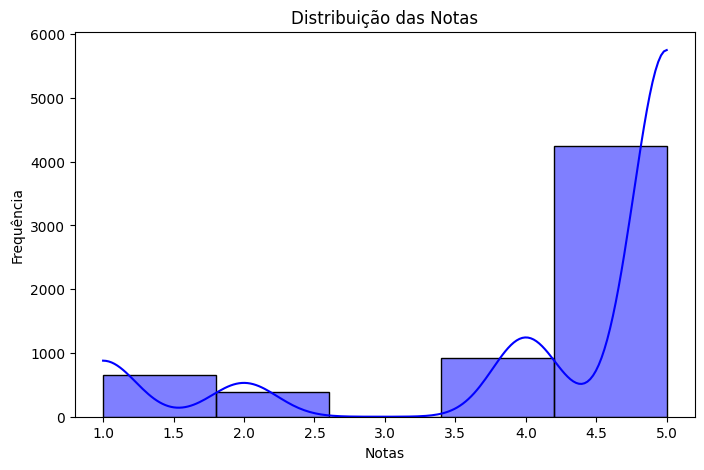

<ipython-input-3-c6b6b39eae3e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


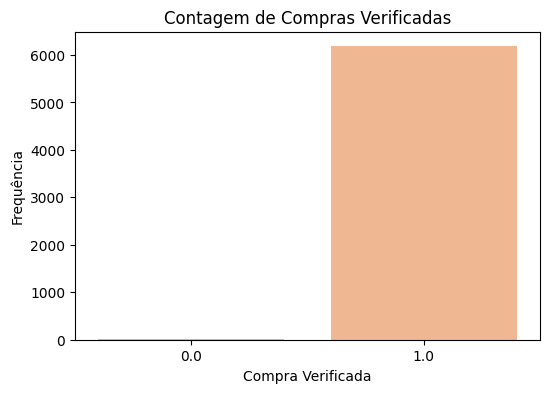

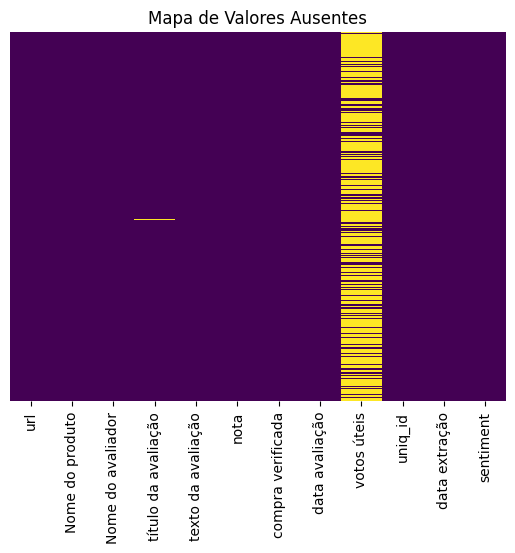

In [ ]:
# ========================================
# 3. Visualizações Exploratórias
# ========================================
# Histograma para analisar a distribuição das notas
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de compras verificadas
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada')
    plt.ylabel('Frequência')
    plt.show()
 #c. Heatmap de Valores Ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()

In [ ]:
# Contagem de avaliações positivas e negativas por produto
sentiment_counts = df.groupby(['Nome do produto', 'sentiment']).size().unstack(fill_value=0)

# Adicionar uma coluna com a soma total de avaliações para cada produto
sentiment_counts['total_reviews'] = sentiment_counts.sum(axis=1)

# Ordenar produtos por avaliações positivas
top_positive_products = sentiment_counts.sort_values(by='positive', ascending=False).head(3)

# Ordenar produtos por avaliações negativas
top_negative_products = sentiment_counts.sort_values(by='negative', ascending=False).head(3)

# Exibindo os resultados
print("Top 3 produtos mais bem avaliados:")
print(top_positive_products)

print("\nTop 3 produtos mais mal avaliados:")
print(top_negative_products)


Top 3 produtos mais bem avaliados:
sentiment                                           negative  positive  \
Nome do produto                                                          
adidas Mens Icon Bounce Blue Size: 17                      0        10   
PUMA Women's Softride Sophia Running Shoe, Blac...         0        10   
Skechers Women's Walking Sneaker                           0        10   

sentiment                                           total_reviews  
Nome do produto                                                    
adidas Mens Icon Bounce Blue Size: 17                          10  
PUMA Women's Softride Sophia Running Shoe, Blac...             10  
Skechers Women's Walking Sneaker                               10  

Top 3 produtos mais mal avaliados:
sentiment                                           negative  positive  \
Nome do produto                                                          
Lico Fremont Cross Country Running Shoe, Marine...         9         0

Top 5 produtos com maior proporção de avaliações positivas:
sentiment                                           positive  total_reviews  \
Nome do produto                                                               
 hanno lucine colorate che puoi spegnere ed acc...         1              1   
PUMA Men's Evospeed Sprint 10 Track and Field S...         2              2   
PUMA Men's Respin Sneaker, White White-Limoges ...        10             10   
PUMA Pacer Future Sneaker, Black White, 6.5 US ...         1              1   
PUMA Softride Sophia Slip On Running Shoe, Peon...         1              1   

sentiment                                           positive_ratio  
Nome do produto                                                     
 hanno lucine colorate che puoi spegnere ed acc...             1.0  
PUMA Men's Evospeed Sprint 10 Track and Field S...             1.0  
PUMA Men's Respin Sneaker, White White-Limoges ...             1.0  
PUMA Pacer Future Sneaker, Black White, 6

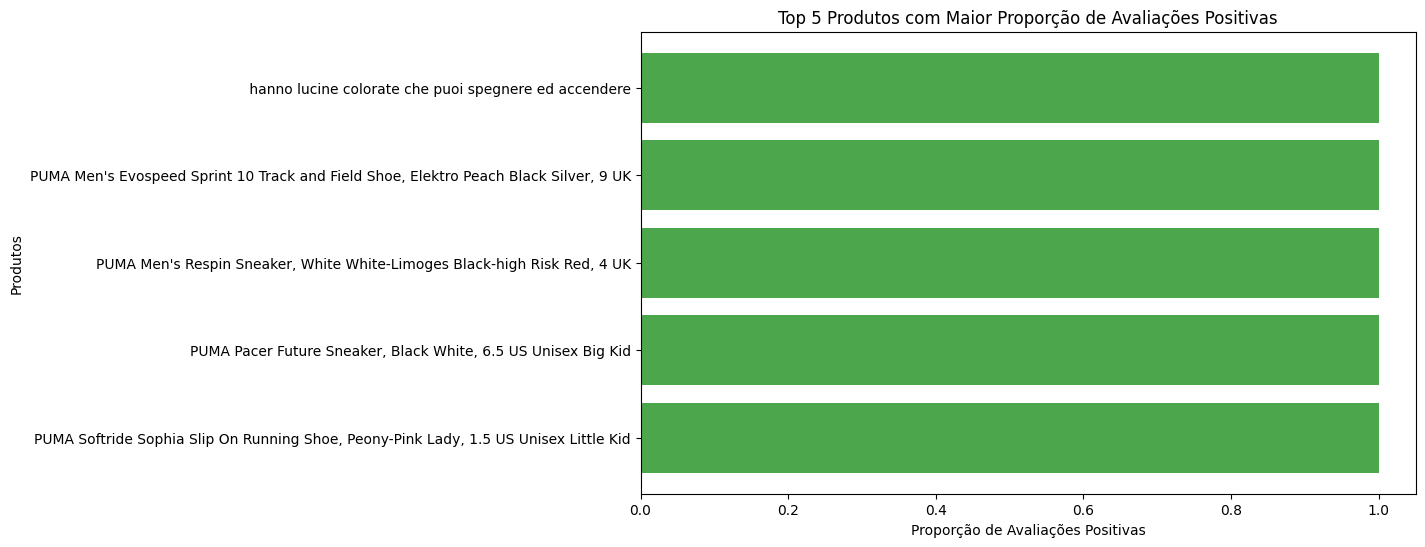

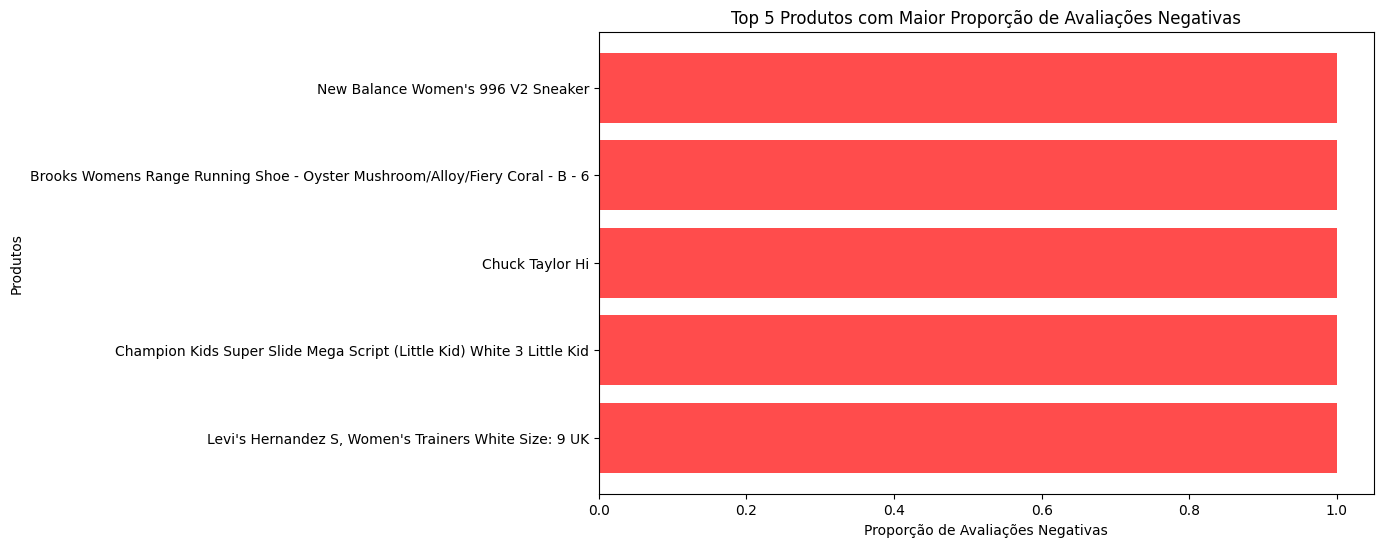

In [ ]:
# ========================================
# Análise de Sentimento por Produto
# ========================================

# Verificando se a coluna 'Nome do produto' e 'sentiment' existem no DataFrame
if 'Nome do produto' in df.columns and 'sentiment' in df.columns:
    # Agrupando os dados por produto e sentimento
    sentiment_counts = df.groupby(['Nome do produto', 'sentiment']).size().unstack(fill_value=0)

    # Adicionando uma coluna com o total de avaliações por produto
    sentiment_counts['total_reviews'] = sentiment_counts.sum(axis=1)

    # Calculando a proporção de avaliações positivas e negativas
    sentiment_counts['positive_ratio'] = sentiment_counts['positive'] / sentiment_counts['total_reviews']
    sentiment_counts['negative_ratio'] = sentiment_counts['negative'] / sentiment_counts['total_reviews']

    # Ordenando os produtos com maiores proporções de avaliações positivas
    top_positive_products = sentiment_counts.sort_values(by='positive_ratio', ascending=False).head(5)

    # Ordenando os produtos com maiores proporções de avaliações negativas
    top_negative_products = sentiment_counts.sort_values(by='negative_ratio', ascending=False).head(5)

    # Exibindo os resultados
    print("Top 5 produtos com maior proporção de avaliações positivas:")
    print(top_positive_products[['positive', 'total_reviews', 'positive_ratio']])

    print("\nTop 5 produtos com maior proporção de avaliações negativas:")
    print(top_negative_products[['negative', 'total_reviews', 'negative_ratio']])

    # Visualizando os resultados com gráficos de barras
    import matplotlib.pyplot as plt

    # Gráfico de barras para produtos mais positivamente avaliados
    plt.figure(figsize=(10, 6))
    plt.barh(top_positive_products.index, top_positive_products['positive_ratio'], color='green', alpha=0.7)
    plt.title('Top 5 Produtos com Maior Proporção de Avaliações Positivas')
    plt.xlabel('Proporção de Avaliações Positivas')
    plt.ylabel('Produtos')
    plt.gca().invert_yaxis()
    plt.show()

    # Gráfico de barras para produtos mais negativamente avaliados
    plt.figure(figsize=(10, 6))
    plt.barh(top_negative_products.index, top_negative_products['negative_ratio'], color='red', alpha=0.7)
    plt.title('Top 5 Produtos com Maior Proporção de Avaliações Negativas')
    plt.xlabel('Proporção de Avaliações Negativas')
    plt.ylabel('Produtos')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Erro: Colunas 'Nome do produto' ou 'sentiment' não estão presentes no DataFrame.")


Top 10 Palavras Mais Frequentes em Avaliações Positivas:
shoes: 1785
size: 1030
comfortable: 989
shoe: 953
great: 853
fit: 840
und: 751
la: 674
like: 596
feet: 584

Top 10 Palavras Mais Frequentes em Avaliações Negativas:
shoes: 519
shoe: 416
size: 277
la: 224
die: 207
like: 179
just: 163
und: 160
fit: 158
que: 147


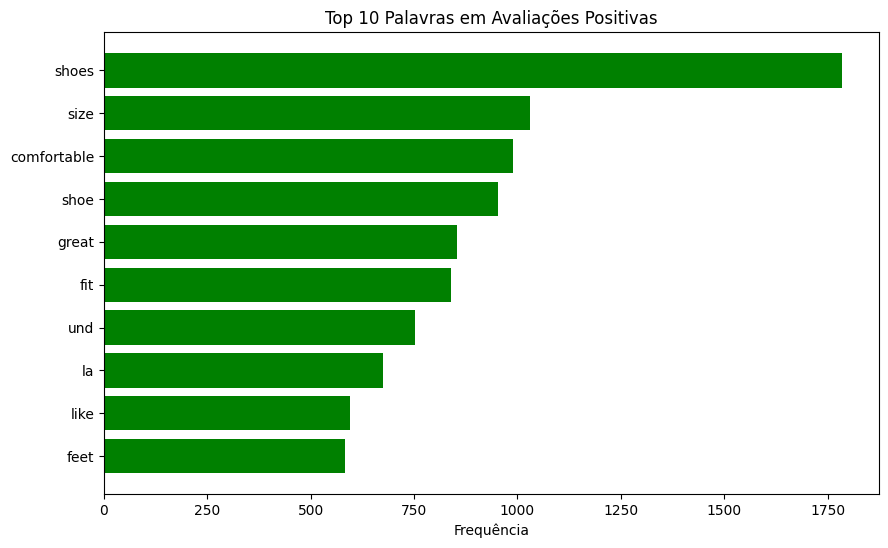

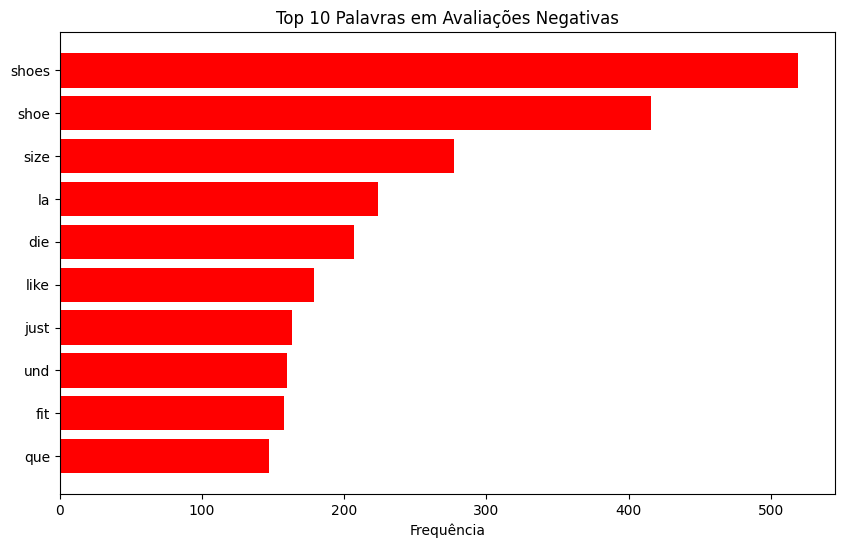

In [ ]:
# ========================================
# Palavras Mais Frequentes por Sentimento
# ========================================
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Separando os dados por sentimento
positive_reviews = df[df['sentiment'] == 'positive']['texto da avaliação']
negative_reviews = df[df['sentiment'] == 'negative']['texto da avaliação']

# Função para extrair palavras mais frequentes
def get_top_words(text_data, top_n=10):
    vectorizer = CountVectorizer(stop_words='english')
    word_count_matrix = vectorizer.fit_transform(text_data)
    word_counts = word_count_matrix.sum(axis=0)
    word_frequencies = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_frequencies = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
    return word_frequencies[:top_n]

# Palavras mais frequentes em avaliações positivas
top_positive_words = get_top_words(positive_reviews, top_n=10)

# Palavras mais frequentes em avaliações negativas
top_negative_words = get_top_words(negative_reviews, top_n=10)

# Exibindo os resultados
print("Top 10 Palavras Mais Frequentes em Avaliações Positivas:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop 10 Palavras Mais Frequentes em Avaliações Negativas:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

# Visualizando os resultados
def plot_top_words(words, title, color):
    words, freqs = zip(*words)
    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color=color)
    plt.xlabel('Frequência')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Gráficos de barras
plot_top_words(top_positive_words, "Top 10 Palavras em Avaliações Positivas", color='green')
plot_top_words(top_negative_words, "Top 10 Palavras em Avaliações Negativas", color='red')



Tamanho do conjunto de treinamento: 4954
Tamanho do conjunto de teste: 1239

Acurácia do Modelo: 0.87409200968523

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.92      0.27      0.42       208
    positive       0.87      1.00      0.93      1031

    accuracy                           0.87      1239
   macro avg       0.90      0.63      0.68      1239
weighted avg       0.88      0.87      0.84      1239



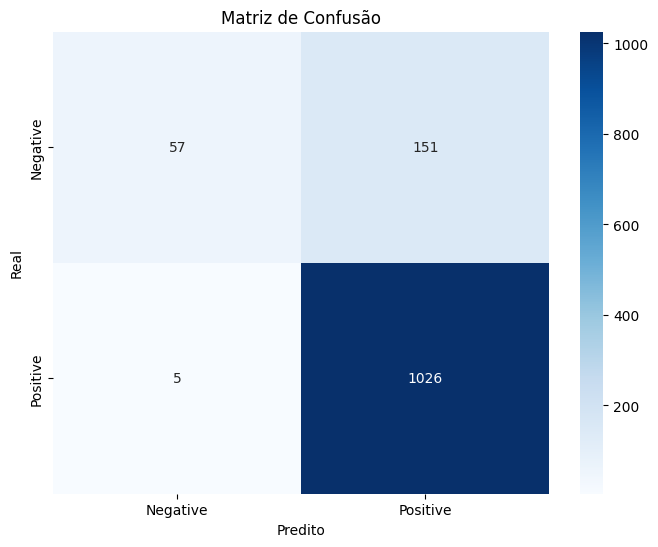


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}

Acurácia após otimização: 0.9055690072639225


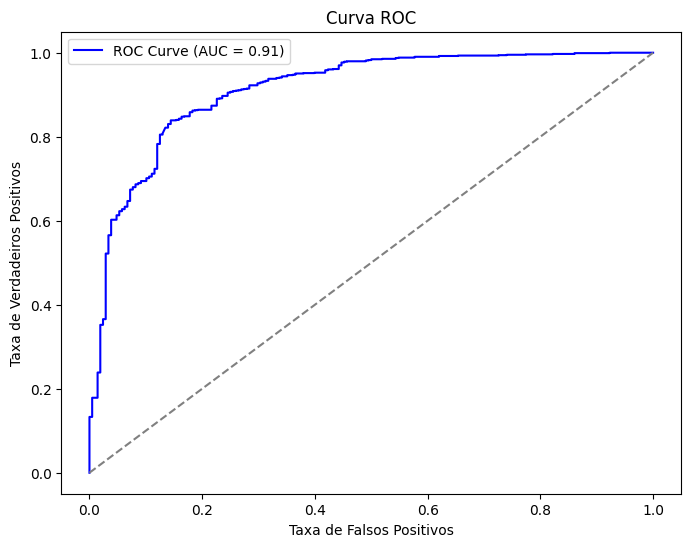


Acurácia usando Pipeline: 0.9055690072639225

Modelo salvo como 'sentiment_analysis_pipeline.pkl'


In [ ]:

# ========================================
# 4. Divisão do Dataset
# ========================================
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X = df['texto da avaliação']  # Dados de entrada (texto)
y = df['sentiment']  # Rótulos de saída (positivo/negativo)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# ========================================
# 5. Vetorização dos Textos
# ========================================
# Convertendo os textos em representações numéricas com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 6. Treinamento e Avaliação do Modelo
# ========================================
# Treinando o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test_vec)

# Avaliação do modelo inicial
print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# ========================================
# 7. Otimização de Hiperparâmetros
# ========================================
# Ajustando os parâmetros do modelo para melhor desempenho
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_vec)

print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print("\nAcurácia após otimização:", accuracy_score(y_test, y_pred_optimized))

# ========================================
# 8. Curva ROC
# ========================================
# Avaliação do desempenho do modelo otimizado usando a Curva ROC
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

# ========================================
# 9. Implementação com Pipeline
# ========================================
# Criando um pipeline para integração de vetorização e modelo
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver']))
])

pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)
print("\nAcurácia usando Pipeline:", accuracy_score(y_test, y_pipeline_pred))

# ========================================
# 10. Salvando o Modelo Treinado
# ========================================
# Salvando o pipeline treinado para reuso futuro
joblib.dump(pipeline, 'sentiment_analysis_pipeline.pkl')
print("\nModelo salvo como 'sentiment_analysis_pipeline.pkl'")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar se a coluna 'data avaliação' existe e não está vazia
if 'data avaliação' in df.columns and not df['data avaliação'].isnull().all():
    # Garantir que 'data avaliação' está no formato datetime
    df['data avaliação'] = pd.to_datetime(df['data avaliação'], errors='coerce')

    # Remover valores nulos após a conversão
    df = df[df['data avaliação'].notnull()]

    # Contagem de sentimentos ao longo do tempo
    temporal_sentiment_analysis = df.groupby(['data avaliação', 'sentiment']).size().unstack(fill_value=0)

    # Verificar se a análise temporal contém dados suficientes
    if not temporal_sentiment_analysis.empty:
        # Plotando a evolução temporal dos sentimentos
        temporal_sentiment_analysis.plot(figsize=(12, 6), marker='o')
        plt.title('Evolução Temporal de Sentimentos')
        plt.xlabel('Data da Avaliação')
        plt.ylabel('Número de Avaliações')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend(title='Sentimentos')
        plt.show()

        # Insights sobre tendências
        print("\nResumo Estatístico de Sentimentos ao Longo do Tempo:")
        print(temporal_sentiment_analysis.describe())
    else:
        print("Não há dados suficientes para plotar sentimentos positivos e negativos ao longo do tempo.")
else:
    print("A coluna 'data avaliação' está ausente ou contém apenas valores nulos.")


<ipython-input-8-c64492192146>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data avaliação'] = pd.to_datetime(df['data avaliação'], errors='coerce')


Não há dados suficientes para plotar sentimentos positivos e negativos ao longo do tempo.



Top 10 Palavras com Maior Impacto Positivo:
          Word    Impact
9        great  4.149206
8  comfortable  3.333085
7      perfect  3.138204
6         love  3.055924
5        super  3.030529
4        loves  2.192911
3       little  2.142849
2          muy  2.028903
1         nice  1.905090
0        comfy  1.842965

Top 10 Palavras com Maior Impacto Negativo:
            Word    Impact
0         return -3.316786
1   disappointed -3.059729
2  uncomfortable -2.977791
3          apart -2.576386
4       returned -2.448733
5          nicht -2.160039
6            bad -2.111318
7          month -2.055776
8          cheap -2.023137
9          small -1.948693


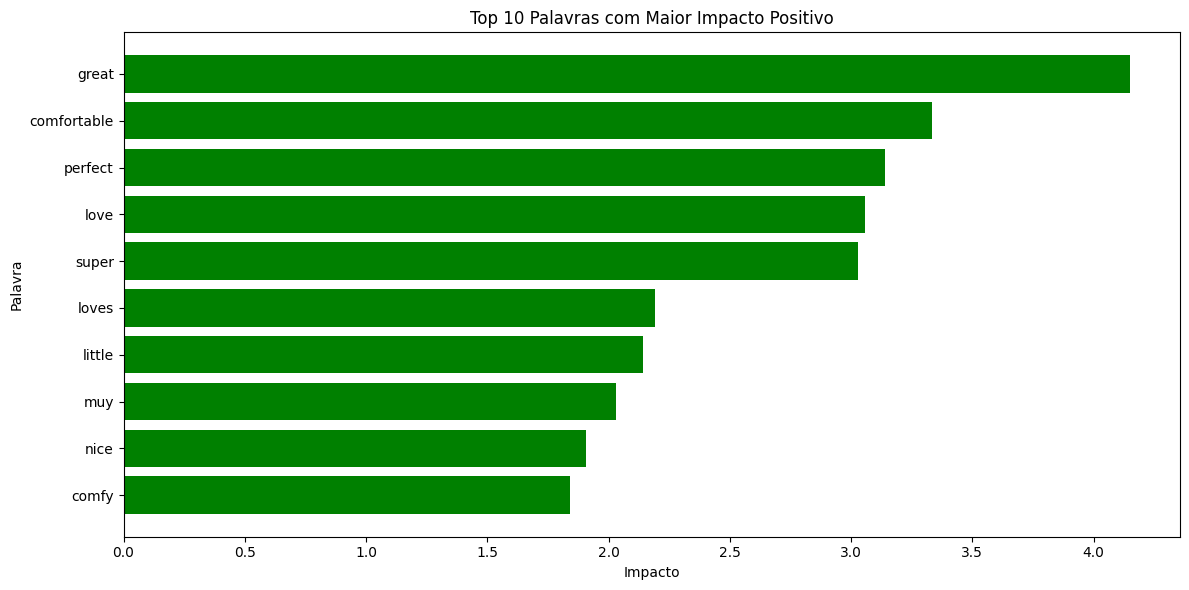

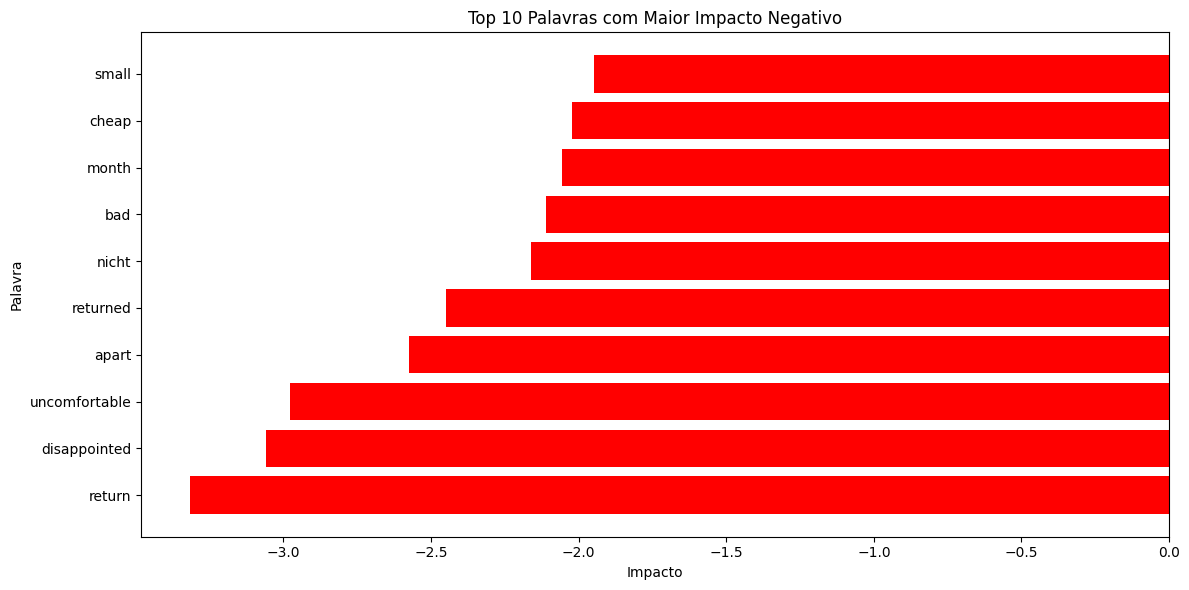

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Verificar se o modelo foi treinado
if hasattr(model, 'coef_') and hasattr(vectorizer, 'get_feature_names_out'):
    # Extrair os nomes das palavras do TF-IDF
    feature_names = vectorizer.get_feature_names_out()

    # Extrair os coeficientes do modelo (pesos das palavras)
    coef = model.coef_[0]

    # Organizar as palavras mais impactantes (positivas e negativas)
    top_positive_indices = np.argsort(coef)[-10:]  # Top 10 positivas
    top_negative_indices = np.argsort(coef)[:10]  # Top 10 negativas

    # Criar DataFrame para exibir os resultados
    top_positive_words = pd.DataFrame({
        'Word': [feature_names[i] for i in top_positive_indices],
        'Impact': [coef[i] for i in top_positive_indices]
    })

    top_negative_words = pd.DataFrame({
        'Word': [feature_names[i] for i in top_negative_indices],
        'Impact': [coef[i] for i in top_negative_indices]
    })

    # Exibir os resultados no terminal
    print("\nTop 10 Palavras com Maior Impacto Positivo:")
    print(top_positive_words.sort_values(by='Impact', ascending=False))

    print("\nTop 10 Palavras com Maior Impacto Negativo:")
    print(top_negative_words.sort_values(by='Impact'))

    # Visualizar os resultados (gráficos de barras)
    plt.figure(figsize=(12, 6))
    plt.barh(top_positive_words['Word'], top_positive_words['Impact'], color='green', label='Positivo')
    plt.title('Top 10 Palavras com Maior Impacto Positivo')
    plt.xlabel('Impacto')
    plt.ylabel('Palavra')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.barh(top_negative_words['Word'], top_negative_words['Impact'], color='red', label='Negativo')
    plt.title('Top 10 Palavras com Maior Impacto Negativo')
    plt.xlabel('Impacto')
    plt.ylabel('Palavra')
    plt.tight_layout()
    plt.show()
else:
    print("Certifique-se de que o modelo e o vetorizador foram treinados antes de realizar essa análise.")


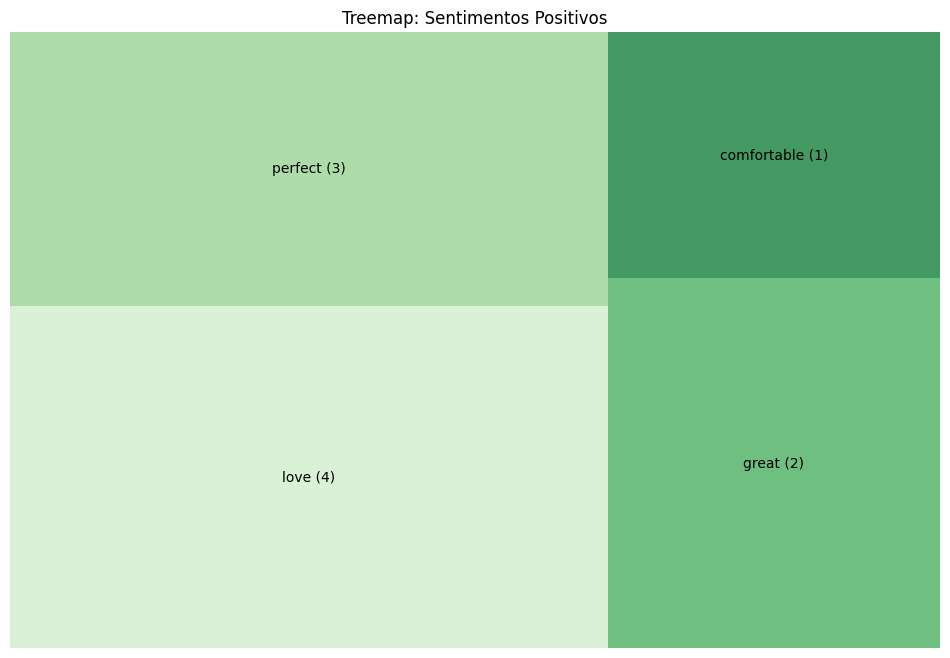

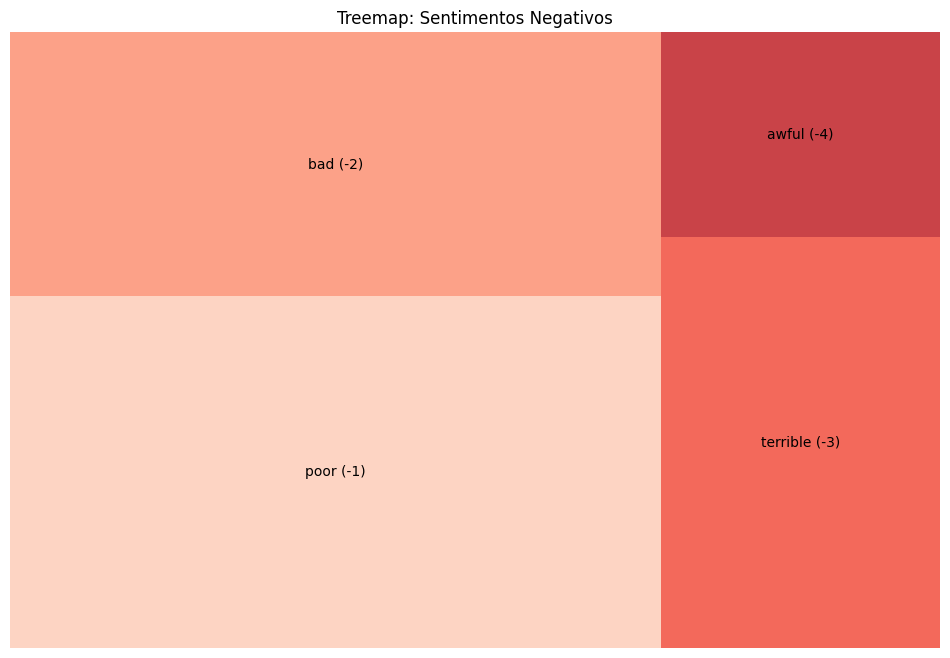

In [ ]:
# Instale o squarify caso ainda não esteja no ambiente
!pip install squarify

# Importação adicional necessária
import squarify

# Exemplo de dataset com categorias positivas e negativas
data = {
    "word": ["love", "perfect", "great", "comfortable", "poor", "bad", "terrible", "awful"],
    "frequency": [150, 120, 90, 60, 40, 30, 20, 10],
    "sentiment": ["positive", "positive", "positive", "positive", "negative", "negative", "negative", "negative"],
    "scale": [4, 3, 2, 1, -1, -2, -3, -4]  # Escala de intensidade
}
df = pd.DataFrame(data)

# Filtrando os dados por sentimento
positive_data = df[df["sentiment"] == "positive"]
negative_data = df[df["sentiment"] == "negative"]

# Criando o treemap para sentimentos positivos
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=positive_data["frequency"],
    label=[f'{word} ({scale})' for word, scale in zip(positive_data["word"], positive_data["scale"])],
    color=sns.color_palette("Greens", len(positive_data)),
    alpha=.8
)
plt.title("Treemap: Sentimentos Positivos")
plt.axis('off')
plt.show()

# Criando o treemap para sentimentos negativos
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=negative_data["frequency"],
    label=[f'{word} ({scale})' for word, scale in zip(negative_data["word"], negative_data["scale"])],
    color=sns.color_palette("Reds", len(negative_data)),
    alpha=.8
)
plt.title("Treemap: Sentimentos Negativos")
plt.axis('off')
plt.show()


Planilhas disponíveis: ['amazon_uk_shoes_products_datase']
Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ver

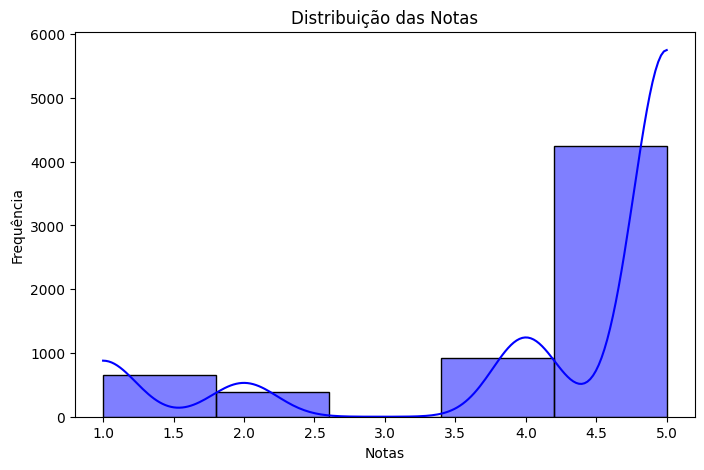

<ipython-input-11-6e6e906d09c9>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


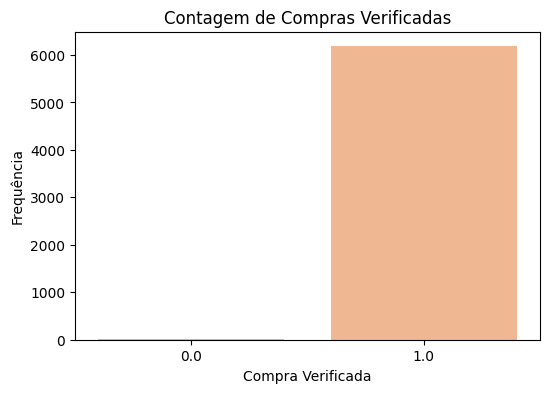

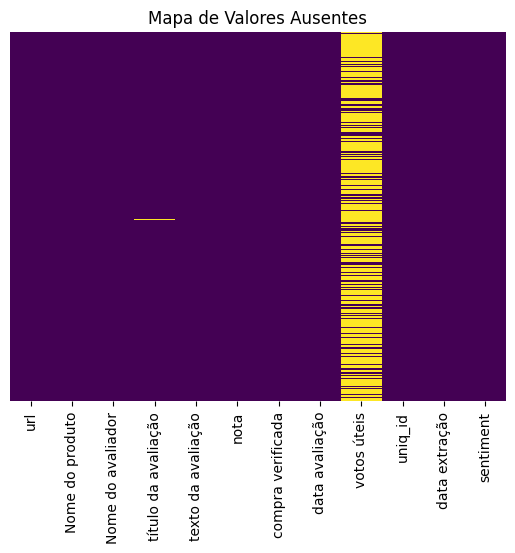

Top 5 produtos com maior proporção de avaliações positivas:
sentiment                                           positive  total_reviews  \
Nome do produto                                                               
 hanno lucine colorate che puoi spegnere ed acc...         1              1   
PUMA Men's Evospeed Sprint 10 Track and Field S...         2              2   
PUMA Men's Respin Sneaker, White White-Limoges ...        10             10   
PUMA Pacer Future Sneaker, Black White, 6.5 US ...         1              1   
PUMA Softride Sophia Slip On Running Shoe, Peon...         1              1   

sentiment                                           positive_ratio  
Nome do produto                                                     
 hanno lucine colorate che puoi spegnere ed acc...             1.0  
PUMA Men's Evospeed Sprint 10 Track and Field S...             1.0  
PUMA Men's Respin Sneaker, White White-Limoges ...             1.0  
PUMA Pacer Future Sneaker, Black White, 6

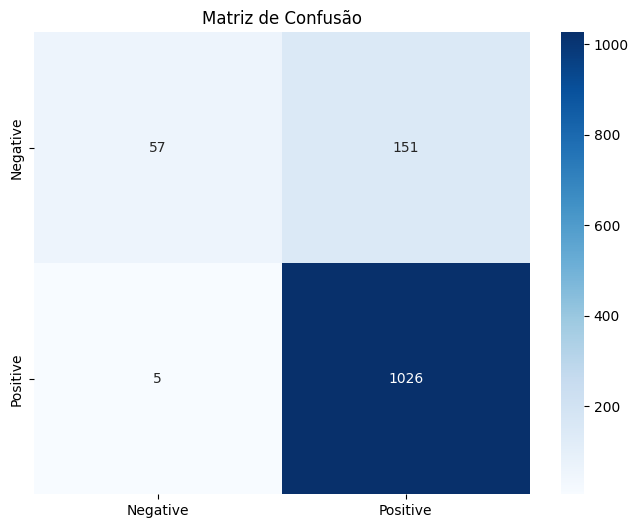


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}

Acurácia após otimização: 0.9055690072639225


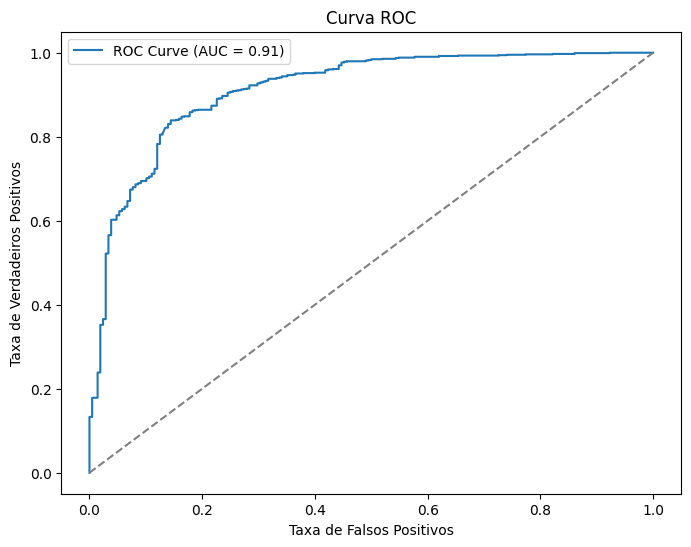


Top 10 Palavras com Maior Impacto Positivo:
['comfy', 'nice', 'muy', 'little', 'loves', 'super', 'love', 'perfect', 'comfortable', 'great']

Top 10 Palavras com Maior Impacto Negativo:
['return', 'disappointed', 'uncomfortable', 'apart', 'returned', 'nicht', 'bad', 'month', 'cheap', 'small']


In [ ]:
# ========================================
# 1. Importação de Bibliotecas
# ========================================
# Importa as bibliotecas necessárias para manipulação de dados, visualização, modelagem e salvamento.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib
import squarify

# ========================================
# 2. Carregamento do Dataset
# ========================================
# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())

# ========================================
# 3. Análise e Limpeza de Dados
# ========================================
# Verificando valores ausentes em cada coluna
print("\nValores ausentes por coluna:\n", df.isnull().sum())

# Criando rótulos de sentimentos
df = df[df['nota'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]  # Remove neutros
df = df[df['texto da avaliação'].notnull()]  # Remove textos ausentes

print("\nDados após limpeza e criação de rótulos:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())

# Exibindo informações sobre o dataset
print("Estrutura do Dataset:\n")
df.info()

# Exibindo os nomes das colunas
print("\nNomes das Colunas:\n")
print(df.columns)

# Exibindo resumo estatístico das colunas numéricas
print("\nResumo Estatístico das Colunas Numéricas:\n")
print(df.describe())

# Exibindo valores ausentes em cada coluna
print("\nValores Ausentes por Coluna:\n")
print(df.isnull().sum())

# ========================================
# 4. Visualizações Exploratórias
# ========================================
# Histograma para analisar a distribuição das notas
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de compras verificadas
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada')
    plt.ylabel('Frequência')
    plt.show()

# Heatmap de Valores Ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()

# ========================================
# 5. Contagem e Proporção de Avaliações por Produto
# ========================================
# Verificando se a coluna 'Nome do produto' e 'sentiment' existem no DataFrame
if 'Nome do produto' in df.columns and 'sentiment' in df.columns:
    sentiment_counts = df.groupby(['Nome do produto', 'sentiment']).size().unstack(fill_value=0)
    sentiment_counts['total_reviews'] = sentiment_counts.sum(axis=1)
    sentiment_counts['positive_ratio'] = sentiment_counts['positive'] / sentiment_counts['total_reviews']
    sentiment_counts['negative_ratio'] = sentiment_counts['negative'] / sentiment_counts['total_reviews']

    top_positive_products = sentiment_counts.sort_values(by='positive_ratio', ascending=False).head(5)
    top_negative_products = sentiment_counts.sort_values(by='negative_ratio', ascending=False).head(5)

    print("Top 5 produtos com maior proporção de avaliações positivas:")
    print(top_positive_products[['positive', 'total_reviews', 'positive_ratio']])
    print("\nTop 5 produtos com maior proporção de avaliações negativas:")
    print(top_negative_products[['negative', 'total_reviews', 'negative_ratio']])
else:
    print("Erro: Colunas 'Nome do produto' ou 'sentiment' não estão presentes no DataFrame.")

# ========================================
# 6. Palavras Mais Frequentes por Sentimento
# ========================================
positive_reviews = df[df['sentiment'] == 'positive']['texto da avaliação']
negative_reviews = df[df['sentiment'] == 'negative']['texto da avaliação']

def get_top_words(text_data, top_n=10):
    vectorizer = CountVectorizer(stop_words='english')
    word_count_matrix = vectorizer.fit_transform(text_data)
    word_counts = word_count_matrix.sum(axis=0)
    word_frequencies = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(word_frequencies, key=lambda x: x[1], reverse=True)[:top_n]

top_positive_words = get_top_words(positive_reviews, top_n=10)
top_negative_words = get_top_words(negative_reviews, top_n=10)

print("\nTop 10 Palavras em Avaliações Positivas:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop 10 Palavras em Avaliações Negativas:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

# ========================================
# 7. Divisão do Dataset
# ========================================
X = df['texto da avaliação']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# ========================================
# 8. Vetorização dos Textos
# ========================================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 9. Treinamento e Avaliação do Modelo
# ========================================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão')
plt.show()

# ========================================
# 10. Otimização de Hiperparâmetros
# ========================================
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_vec)

print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print("\nAcurácia após otimização:", accuracy_score(y_test, y_pred_optimized))

# ========================================
# 11. Curva ROC
# ========================================
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

# ========================================
# 12. Palavras com Maior Impacto no Modelo
# ========================================
if hasattr(model, 'coef_') and hasattr(vectorizer, 'get_feature_names_out'):
    feature_names = vectorizer.get_feature_names_out()
    coef = model.coef_[0]

    top_positive_indices = np.argsort(coef)[-10:]
    top_negative_indices = np.argsort(coef)[:10]

    print("\nTop 10 Palavras com Maior Impacto Positivo:")
    print([feature_names[i] for i in top_positive_indices])

    print("\nTop 10 Palavras com Maior Impacto Negativo:")
    print([feature_names[i] for i in top_negative_indices])


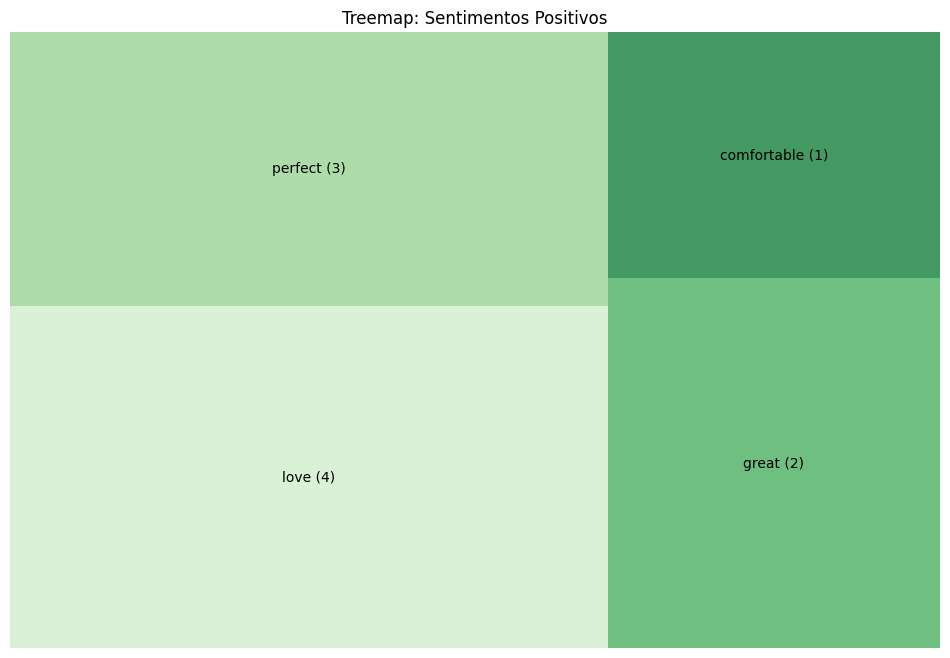

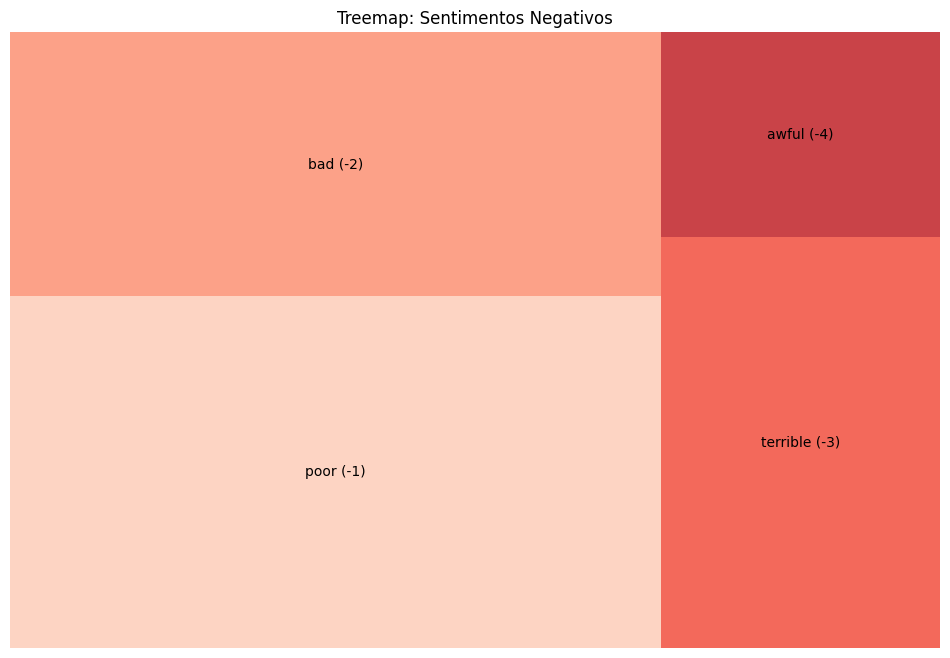

In [ ]:
# ========================================
# 7. Treemap de Sentimentos
# ========================================
# Exemplo de dataset com categorias positivas e negativas
data = {
    "word": ["love", "perfect", "great", "comfortable", "poor", "bad", "terrible", "awful"],
    "frequency": [150, 120, 90, 60, 40, 30, 20, 10],
    "sentiment": ["positive", "positive", "positive", "positive", "negative", "negative", "negative", "negative"],
    "scale": [4, 3, 2, 1, -1, -2, -3, -4]
}
df = pd.DataFrame(data)

positive_data = df[df["sentiment"] == "positive"]
negative_data = df[df["sentiment"] == "negative"]

# Criando o Treemap para sentimentos positivos
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=positive_data["frequency"],
    label=[f'{word} ({scale})' for word, scale in zip(positive_data["word"], positive_data["scale"])],
    color=sns.color_palette("Greens", len(positive_data)),
    alpha=.8
)
plt.title("Treemap: Sentimentos Positivos")
plt.axis('off')
plt.show()

# Criando o Treemap para sentimentos negativos
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=negative_data["frequency"],
    label=[f'{word} ({scale})' for word, scale in zip(negative_data["word"], negative_data["scale"])],
    color=sns.color_palette("Reds", len(negative_data)),
    alpha=.8
)
plt.title("Treemap: Sentimentos Negativos")
plt.axis('off')
plt.show()